In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/loan_data.csv')
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.isna().sum() #returns the number of null values in each column

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [ ]:
#We need to clean the null data points from dataset
df.dropna(inplace=True) #dropping rows with missing data. Changes applied directly to the same dataframe, no new object created
df.isna().sum()


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.duplicated().sum() #returns number of duplicate rows

0

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

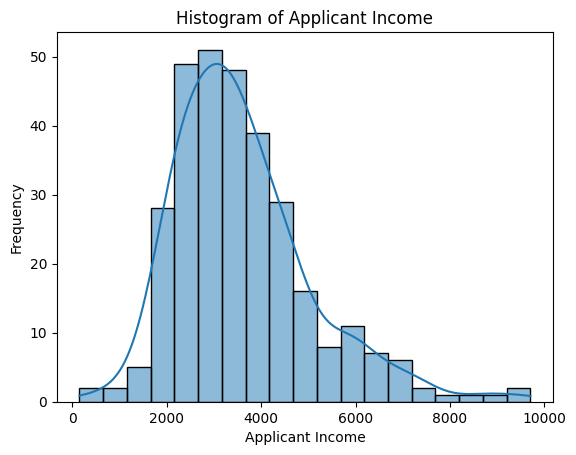

In [ ]:
#Bar graph of numbe rof applicants and their income
sns.histplot(df["ApplicantIncome"],kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

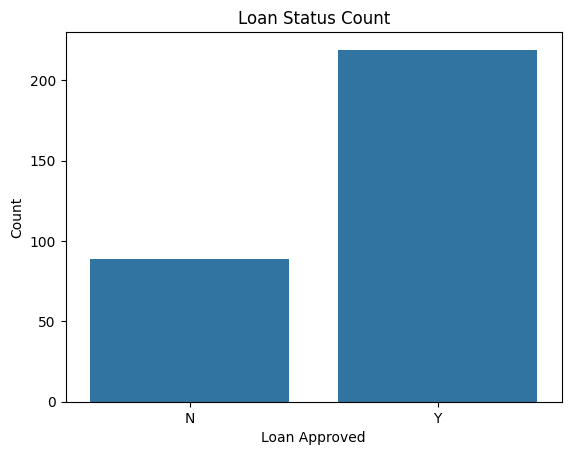

In [ ]:
#Number of people who had their loans approved and didn't have their loans approved
sns.countplot(x="Loan_Status",data =df)
plt.title("Loan Status Count")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

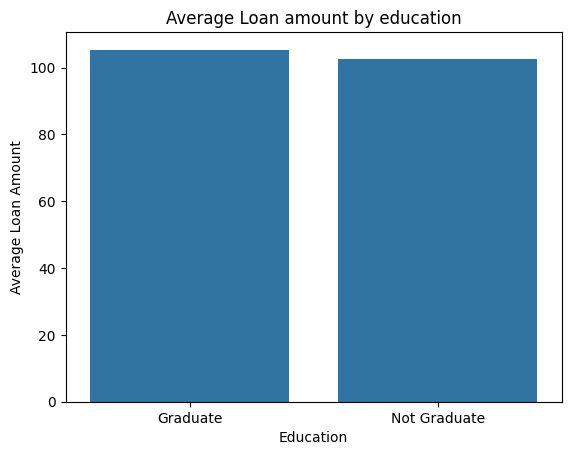

In [ ]:
avg_loan_amount_by_education=df.groupby("Education")["LoanAmount"].mean().reset_index() #average of loan amounts for graduates and non-graduates
sns.barplot(x="Education",y="LoanAmount", data = avg_loan_amount_by_education)
plt.title("Average Loan amount by education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()


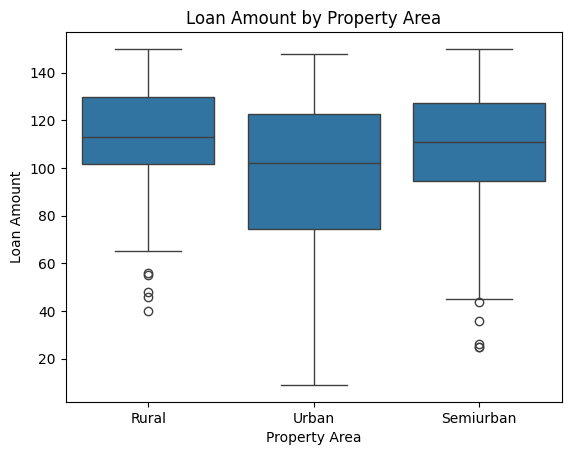

In [ ]:
sns.boxplot(x="Property_Area",y="LoanAmount",data = df)
plt.title("Loan Amount by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()


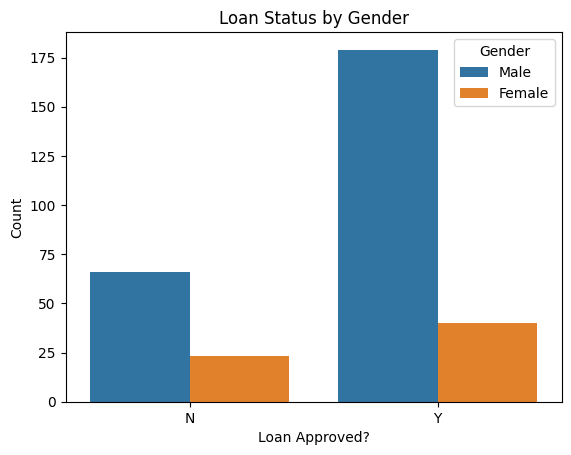

In [ ]:
sns.countplot(x="Loan_Status",hue="Gender",data = df)
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approved?")
plt.ylabel("Count")
plt.show()
#

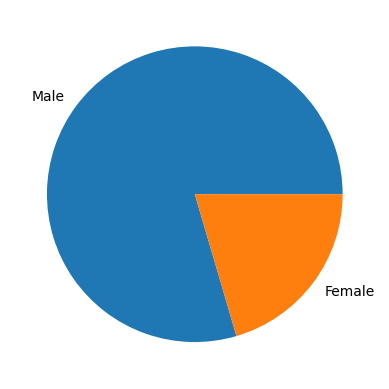

In [ ]:
df["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [ ]:
loan_status_by_married=df.groupby("Married")["Loan_Status"].value_counts().unstack()
loan_status_by_married

Loan_Status,N,Y
Married,,
No,44,79
Yes,45,140


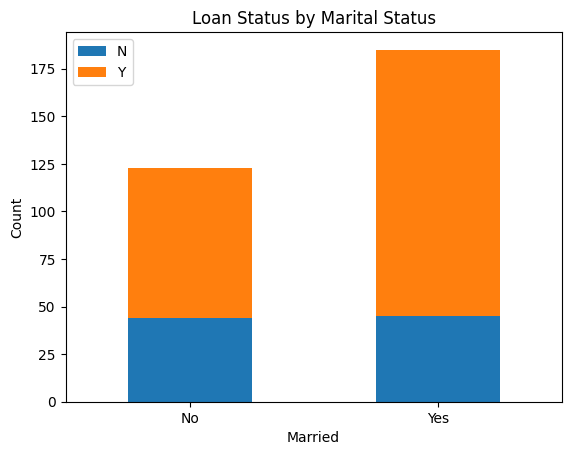

In [ ]:
loan_status_by_married.plot(kind="bar",stacked=True)
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=0)
plt.show()

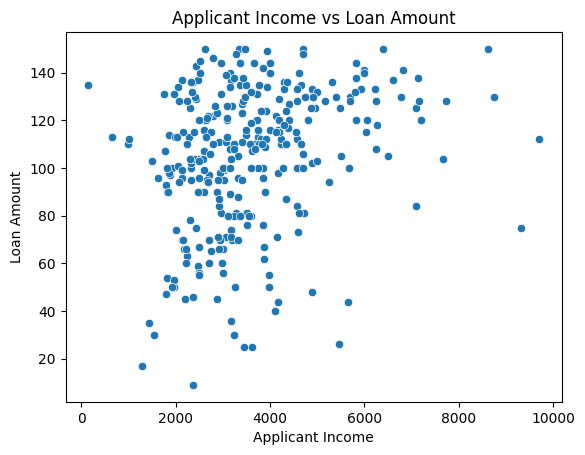

In [ ]:
sns.scatterplot(x="ApplicantIncome",y="LoanAmount",data=df)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [ ]:
avg_loan_term_by_employed=df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


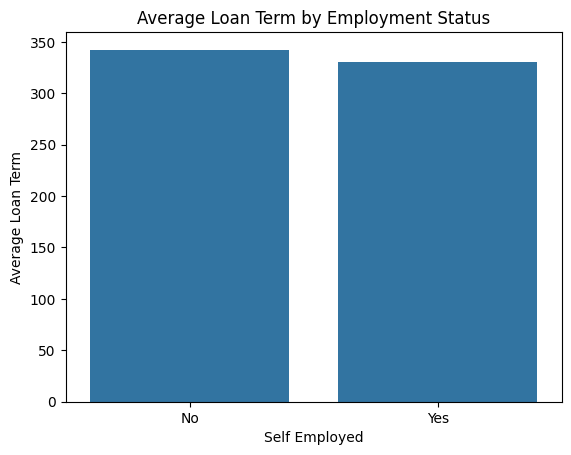

In [ ]:
sns.barplot(x="Self_Employed",y="Loan_Amount_Term",data = avg_loan_term_by_employed)
plt.title("Average Loan Term by Employment Status")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Term")
plt.show()


In [ ]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
df["Credit_History"].unique()

array([1., 0.])

In [ ]:
X=df[["Married","ApplicantIncome","Education","LoanAmount","Credit_History"]]
y=df[["Loan_Status"]]
X


,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [ ]:
y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y["Loan_Status"] = le.fit_transform(y["Loan_Status"])


<ipython-input-23-5bcd19305cc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Loan_Status"] = le.fit_transform(y["Loan_Status"])


In [ ]:
y

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [ ]:
X["Married"]=le.fit_transform(X["Married"])
X["Education"]=le.fit_transform(X["Education"])
X


<ipython-input-25-2426695ef95d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"]=le.fit_transform(X["Married"])
<ipython-input-25-2426695ef95d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"]=le.fit_transform(X["Education"])


,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0
...,...,...,...,...,...
376,1,5703,0,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [29]:
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [87]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [55]:
from sklearn.metrics import accuracy_score
def modelperformance(c):
  print(f"Accuracy score of model is {accuracy_score(y_test,c)}")


In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [89]:
predictions = model.predict(X_test)
modelperformance(predictions)

Accuracy score of model is 0.8387096774193549


In [90]:
from sklearn.neighbors import KNeighborsClassifier
param_grid={"n_neighbors":[3,5,7,8,6],"weights":["uniform","distance"]}
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid)
gridkn.fit(X_train,y_train.values.ravel())



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 8, 6],
                         'weights': ['uniform', 'distance']})

In [91]:
knpreds=gridkn.predict(X_test)
modelperformance(knpreds)

Accuracy score of model is 0.8225806451612904


In [92]:
#testing with a random example in logistic regression model
output=model.predict([[1,5000,1,135,1]]) #Applicant is married, has income of 5000, is a graduate, loan amount is 135, and has a credit history
output # 1 means loan provided, 0 means loan rejected

array([1])

In [93]:
#testing with a random example in k-nearest neighbors model
output=gridkn.predict([[1,5000,1,135,1]]) #Applicant is married, has income of 5000, is a graduate, loan amount is 135, and has a credit history
output # 1 means loan provided, 0 means loan rejected

array([1])